<a href="https://colab.research.google.com/github/pingli10/Project-2---Part-3--Core--/blob/main/9_project_2_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) source of data : Heart Failure Prediction Dataset https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

2) Age': age of the patient

'Sex': sex of the patient

'ChestPainType' : chest pain type

, 'RestingBP': resting blood pressure

'Cholesterol':serum cholesterol

'FastingBS':A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours.

'RestingECG': Resting ECG systems is designed to help improve clinical accuracy and connect you to advanced data analysis tools so you can make decisions 'MaxHR': the greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.

'ExerciseAngina': build up your activity level gradually and take regular breaks. 'Oldpeak':ST depression induced by exercise relative to rest ( 'ST_Slope': The ST Segment represents the interval between ventricular depolarization and repolarization 'HeartDisease': yes or no heart diease

3) The target would be HeartDiease

4) This is a classification problem

5) No less meaningful feature.

6) 918 rows in the data

7) I need to encode cat data and numeric data, then to make classification prediction.

In [192]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import XGBClassifier
data = '/content/drive/MyDrive/coding dojo/week 10 project 2 part 3/heart.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
df = pd.read_csv(data)

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [196]:
# check missing value
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [197]:
# check duplicate value
df.duplicated().sum()

0

In [198]:
df.shape

(918, 12)

In [199]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [200]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [201]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

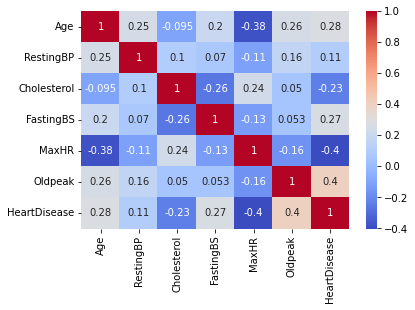

In [202]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Age', 'RestingECG','FastingBS','Oldpeak' have positive relationship with heart disease.

'Cholesterol', 'MaxHR' have negtive relationship with heart diease.

# Univariate analysis

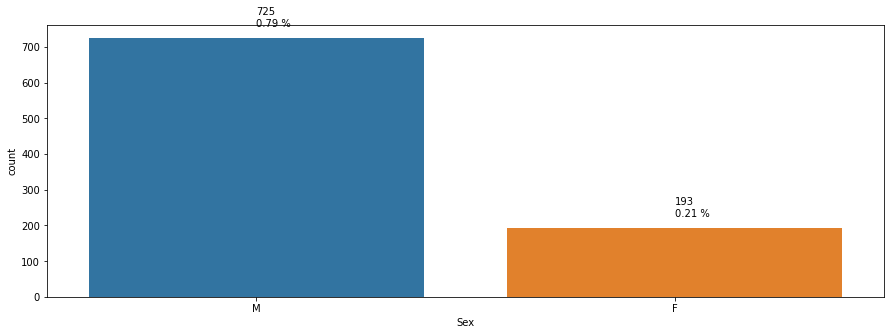

In [203]:
# age distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='Sex');
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

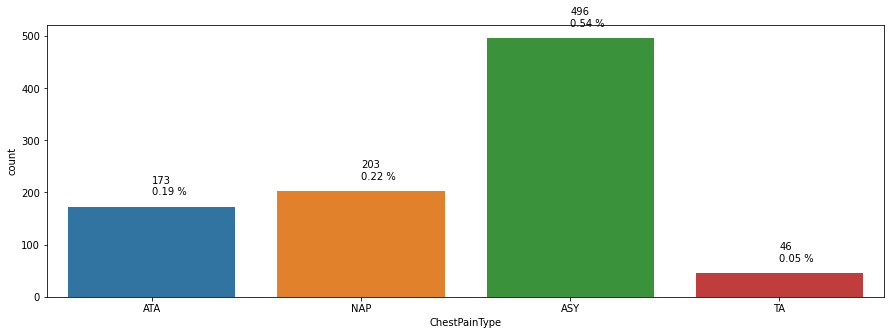

In [204]:
#chest pain distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='ChestPainType')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

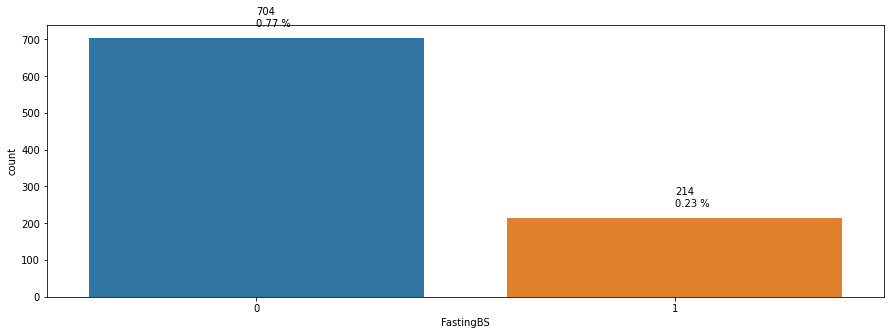

In [205]:
#Fasting Bs distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='FastingBS')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

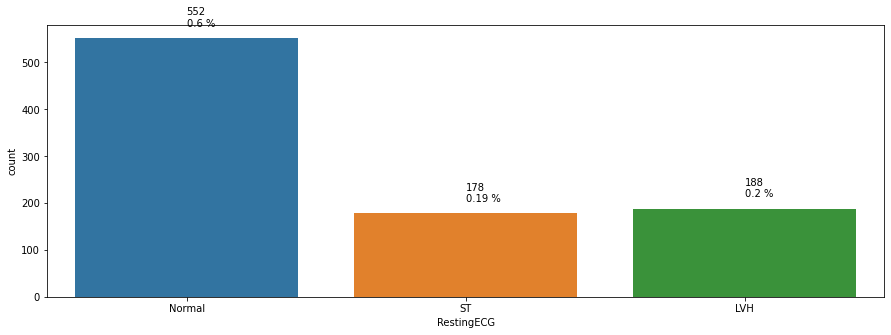

In [206]:
#Resting ECG distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='RestingECG')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

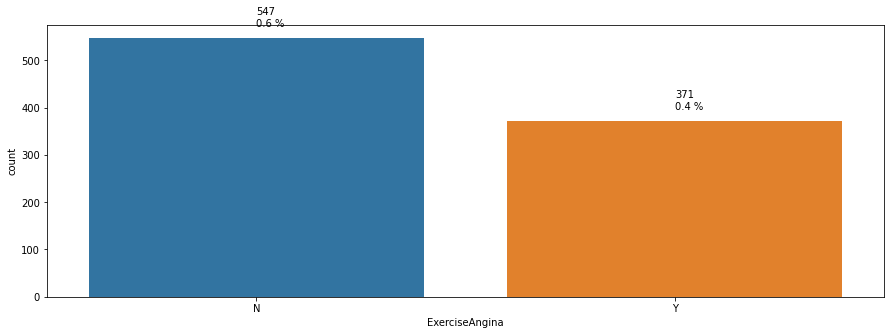

In [207]:
#Exercise Angina Distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='ExerciseAngina')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

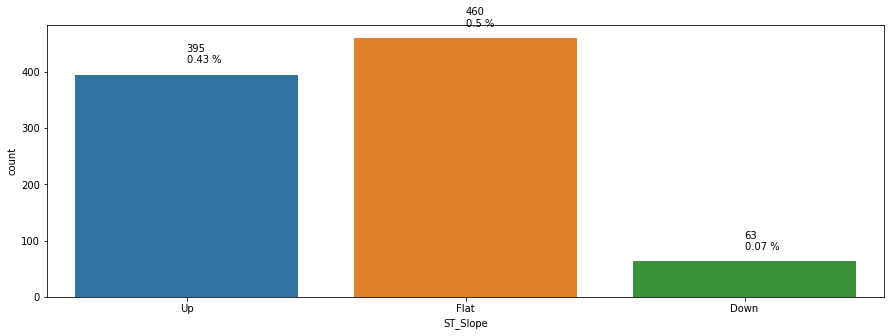

In [208]:
# ST_slope distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x='ST_Slope')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, p.get_height(), str(p.get_height()) +'\n'+ str(round(p.get_height()/len(df), 2)) +' %\n')

# Indication of the value is greater than 50 % and less than 10%
# Male and Female are almost 80:20.
# ASY(Chest pain type) = 54%
# 0(FastingBS) = 77%
# flat(st_slope) = 50%
# N(ExerciseAngina) = 60%
# TA(Chest pain type) = 5%
# Down(ST_Slope) = 7%

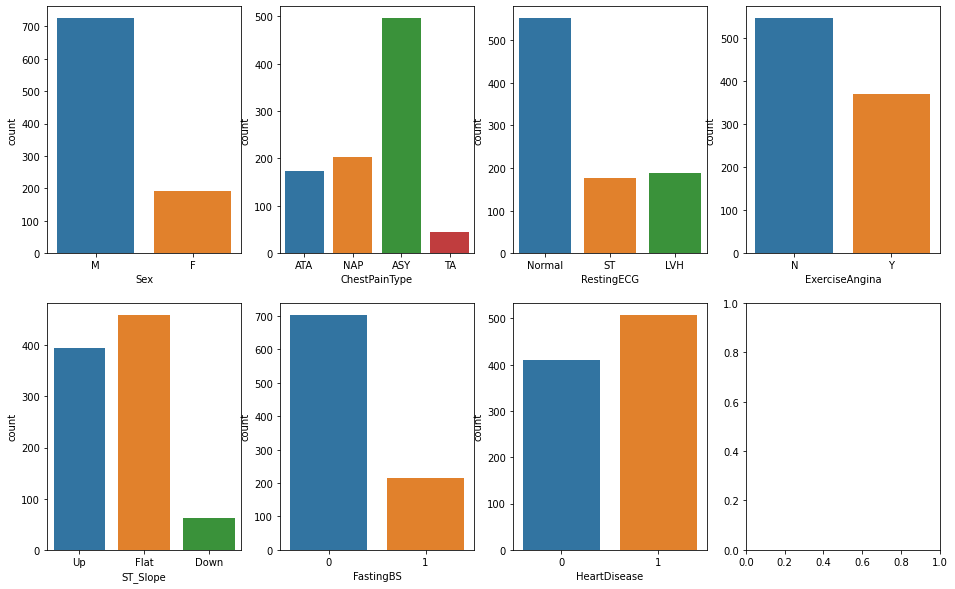

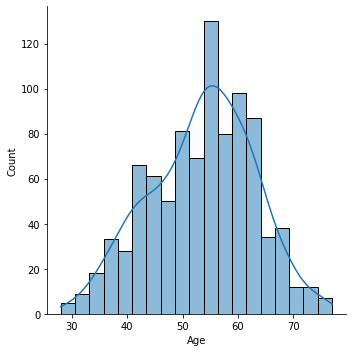

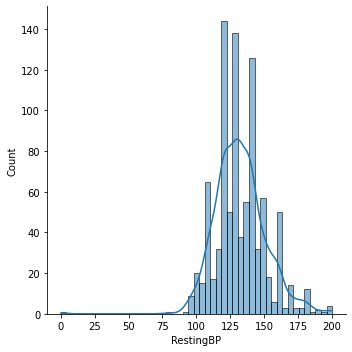

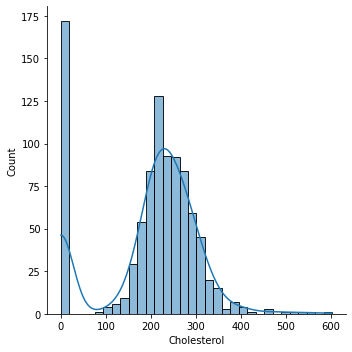

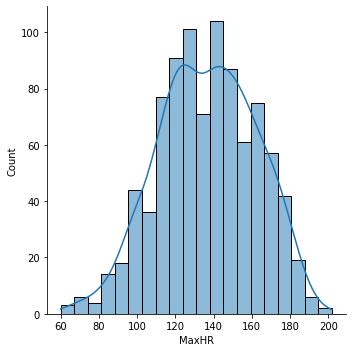

In [209]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
fig,axes = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Sex',data=df,ax=axes[0,0])
sns.countplot('ChestPainType',data=df,ax=axes[0,1])
sns.countplot('RestingECG',data=df,ax=axes[0,2])
sns.countplot('ExerciseAngina',data=df,ax=axes[0,3])
sns.countplot('ST_Slope',data=df,ax=axes[1,0])
sns.countplot('FastingBS',data=df,ax=axes[1,1])
sns.countplot('HeartDisease',data=df,ax=axes[1,2])
sns.displot(df['Age'],kde=True)
sns.displot(df['RestingBP'],kde=True)
sns.displot(df['Cholesterol'],kde=True)
sns.displot(df['MaxHR'],kde=True)


In [210]:
# see value
for col in df.columns:
  print(f'column={col}')
  print(df[col].value_counts(dropna=True))
  print('\n\n')

column=Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64



column=Sex
M    725
F    193
Name: Sex, dtype: int64



column=ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64



column=RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64



column=Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222,

In [211]:
# look old peak negtive value
old_peak = df[df['Oldpeak']<0] 
old_peak

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


# Bivariate analysis

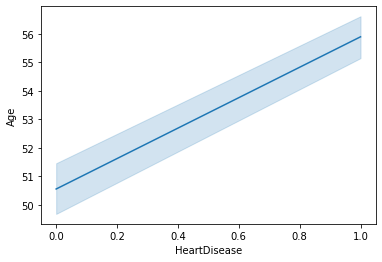

In [213]:
sns.lineplot(data=df,x='HeartDisease',y='Age')

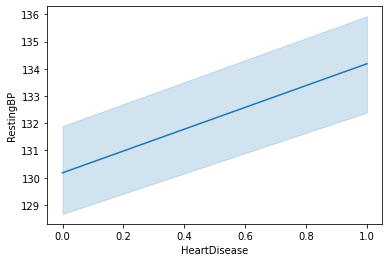

In [214]:
sns.lineplot(data=df,x='HeartDisease',y='RestingBP')

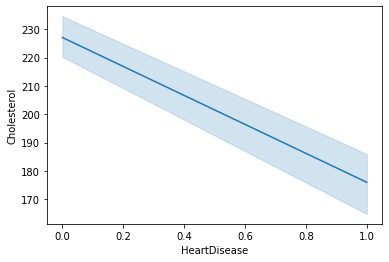

In [215]:
sns.lineplot(data=df,x='HeartDisease',y='Cholesterol')

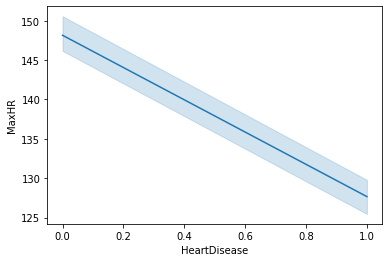

In [216]:
sns.lineplot(data=df,x='HeartDisease',y='MaxHR')

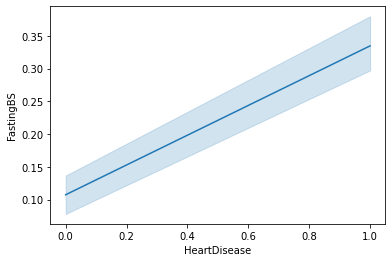

In [217]:
sns.lineplot(data=df,x='HeartDisease',y='FastingBS')

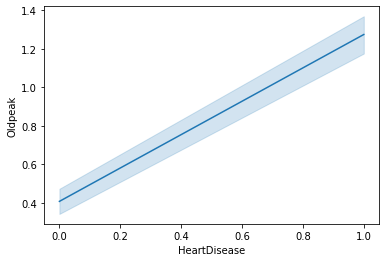

In [218]:
sns.lineplot(data=df,x='HeartDisease',y='Oldpeak')

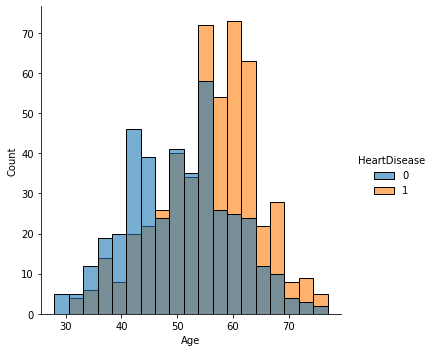

In [219]:
sns.displot(data=df,x='Age',hue='HeartDisease',alpha=0.6)

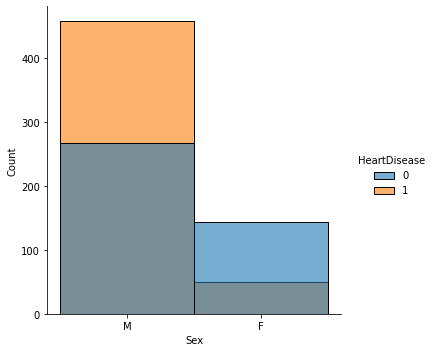

In [220]:

sns.displot(data=df,x='Sex',hue='HeartDisease',alpha=0.6)

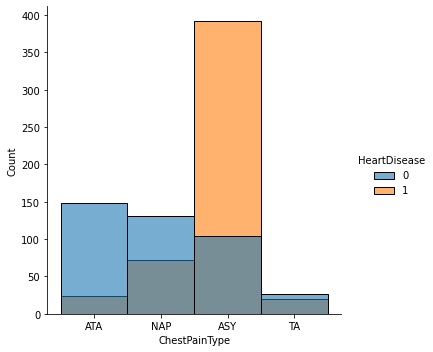

In [221]:
sns.displot(data=df,x='ChestPainType',hue='HeartDisease',alpha=0.6)

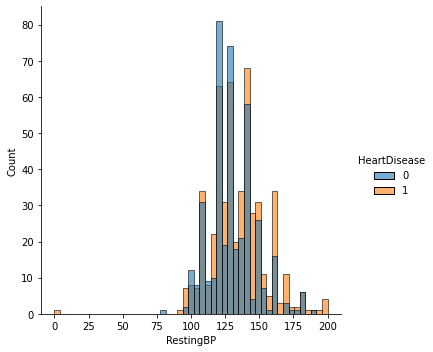

In [222]:
sns.displot(data=df,x='RestingBP',hue='HeartDisease',alpha=0.6)

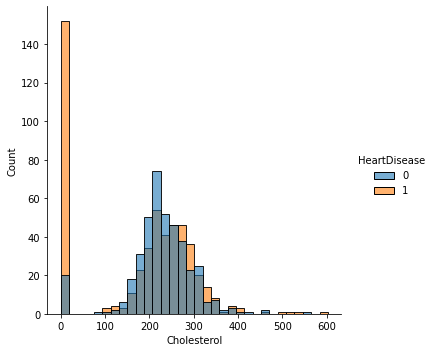

In [223]:
sns.displot(data=df,x='Cholesterol',hue='HeartDisease',alpha=0.6)

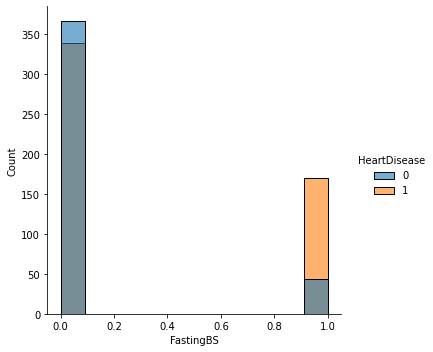

In [224]:
sns.displot(data=df,x='FastingBS',hue='HeartDisease',alpha=0.6)

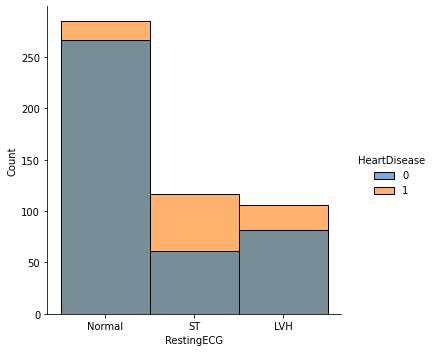

In [225]:
sns.displot(data=df,x='RestingECG',hue='HeartDisease',alpha=0.6)

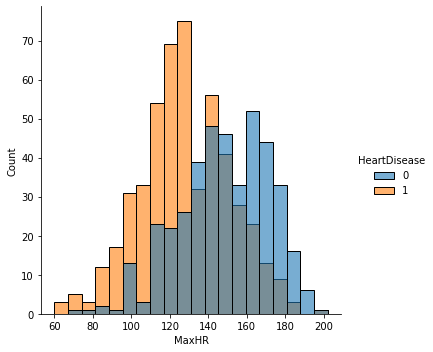

In [226]:
sns.displot(data=df,x='MaxHR',hue='HeartDisease',alpha=0.6)

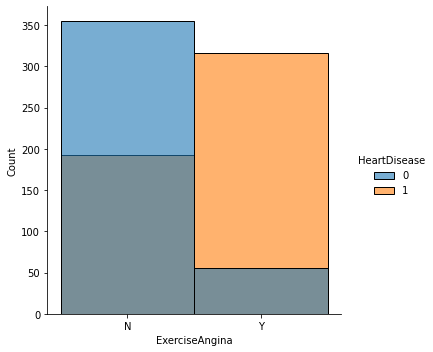

In [227]:
sns.displot(data=df,x='ExerciseAngina',hue='HeartDisease',alpha=0.6)

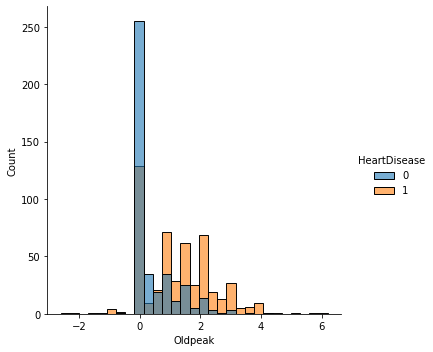

In [228]:
sns.displot(data=df,x= 'Oldpeak',hue='HeartDisease',alpha=0.6)

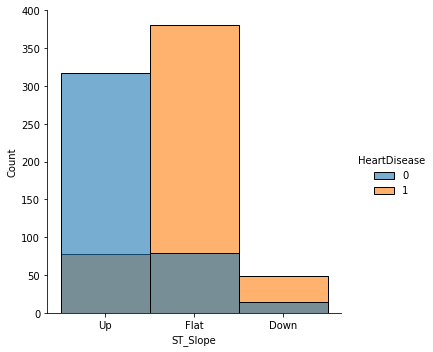

In [229]:
sns.displot(data=df,x='ST_Slope',hue='HeartDisease',alpha=0.6)

# OBSERVATION
Age', 'RestingECG','FastingBS','Oldpeak' have positive relationship with heart disease.

'Cholesterol', 'MaxHR' have negtive relationship with heart diease.

1.The age range from 50 to 60 has great distribution in heart disease

2.Male is mainly affected by heart disease.

3.ASY(Chest Pain Type) has the greatest distribution of heart disease.

4.Cholesterol having value near 200 is good for heart otherwise low and high cholesterol can cause heart disease.

5.As the paitences of fastingBS rate is 1, they are prone to get heart disease.

6.As the patiences of MaxHR from 60 to 130, they are prone to get heart disease. As the patiences of MaxHr from 145 to 180, they are not prone to get heart disease.

7.N(ExerciseAngina) patiences are not prone to get heart disease. y(ExerciseAngina) are prone to get heart disease.

8.Oldpeak and heartdisease have postive relationship, old peak rate increases and heartDisease rate increases.

9.Flat(ST_Slope) has the greatest distribution in heart disease.

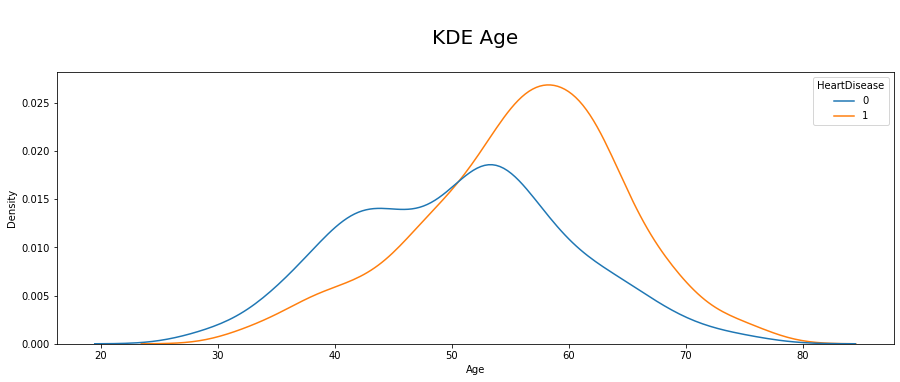

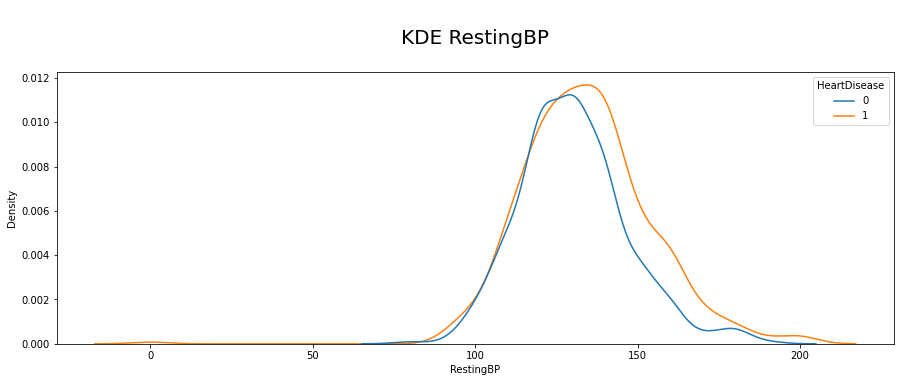

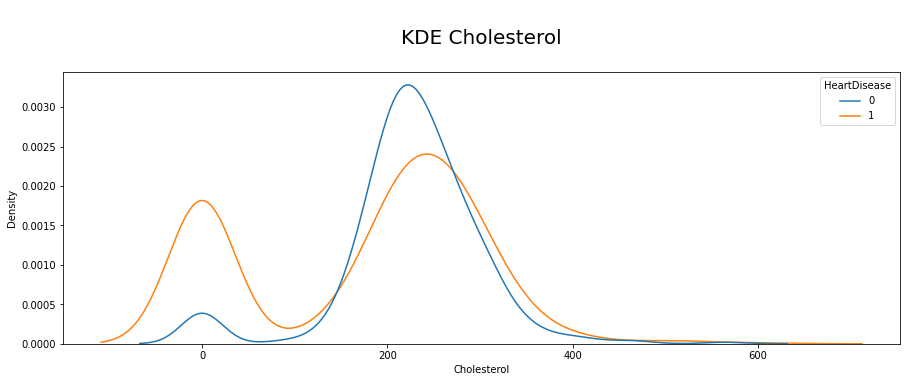

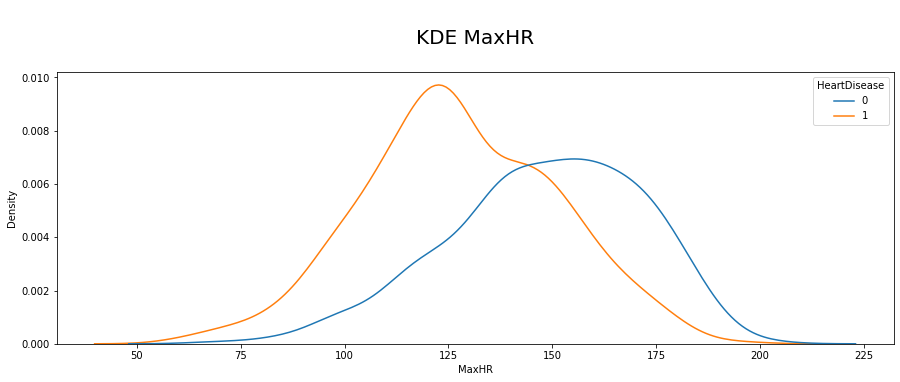

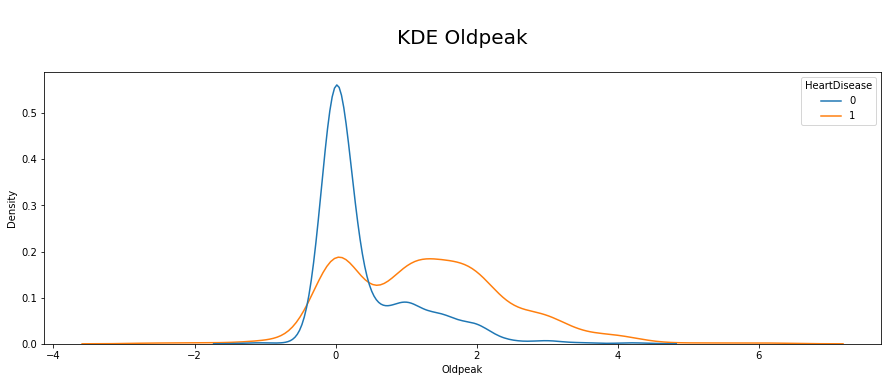

In [230]:
for k in df.columns:
  if (df[k].nunique()>10):
    plt.figure(figsize=(15,5))
    sns.kdeplot(df[k],hue=df['HeartDisease'])
    plt.title(f'\nKDE {k}\n',size=20)


# OBSERVATION
1.HeartDisease risk increases as age increases from 50 to 60.

2.Higer MaxHR shows a sign of healthy heart.

3.As old peak value increases, heart disease incidenc rate also increases.

4.Cholesterol having value near 200 is good for heart otherwise low and high cholesterol can cause heart disease.



In [231]:
group_sex = df.groupby('Sex')['HeartDisease'].value_counts(normalize=True)
group_sex

Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

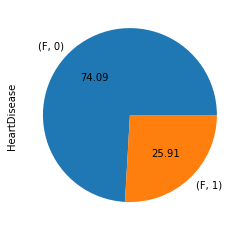

In [232]:
# pie chart for Female
group_sex.iloc[0:2,].plot(kind='pie',autopct='%.2f')


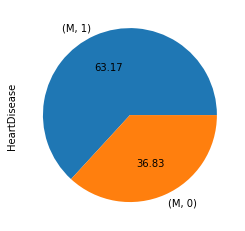

In [233]:
# pie chart for male
group_sex.iloc[2:4,].plot(kind='pie',autopct='%.2f')

In [234]:
group_chestpain = df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True)
group_chestpain

ChestPainType  HeartDisease
ASY            1               0.790323
               0               0.209677
ATA            0               0.861272
               1               0.138728
NAP            0               0.645320
               1               0.354680
TA             0               0.565217
               1               0.434783
Name: HeartDisease, dtype: float64

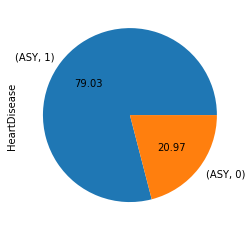

In [235]:
# pie chart for ASY(chestpain)
group_chestpain.iloc[0:2,].plot(kind='pie',autopct='%.2f')

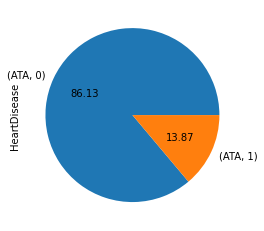

In [236]:
# pie chart for ATA(chest pain)
group_chestpain.iloc[2:4,].plot(kind='pie',autopct='%.2f')

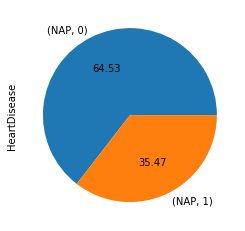

In [237]:
# pie chart for NAP(chest pain)
group_chestpain.iloc[4:6,].plot(kind='pie',autopct='%.2f')

In [238]:
resting = df.groupby('RestingECG')['HeartDisease'].value_counts(normalize=True)
resting

RestingECG  HeartDisease
LVH         1               0.563830
            0               0.436170
Normal      1               0.516304
            0               0.483696
ST          1               0.657303
            0               0.342697
Name: HeartDisease, dtype: float64

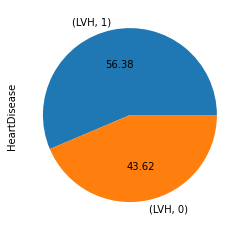

In [239]:
# pie chart for LVH (RestingECG)
resting.iloc[0:2,].plot(kind='pie',autopct='%.2f')


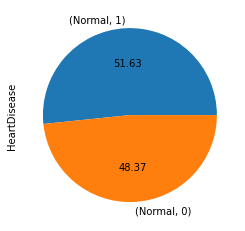

In [240]:
# pie chart for Normal(RestingECG)
resting.iloc[2:4,].plot(kind='pie',autopct='%.2f')


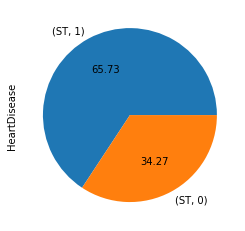

In [241]:
# pie chart for ST(RestingECG)
resting.iloc[4:6,].plot(kind='pie',autopct='%.2f')


In [242]:
group_exercise = df.groupby('ExerciseAngina')['HeartDisease'].value_counts(normalize=True)
group_exercise

ExerciseAngina  HeartDisease
N               0               0.648995
                1               0.351005
Y               1               0.851752
                0               0.148248
Name: HeartDisease, dtype: float64

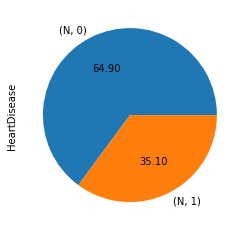

In [243]:
# pie chart for N(ExerciseAngina)
group_exercise.iloc[0:2,].plot(kind='pie',autopct='%.2f')

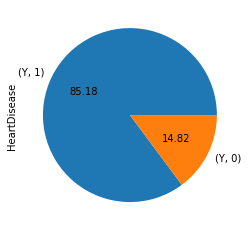

In [244]:
# pie chart for Y(ExerciseAngina)
group_exercise.iloc[2:4,].plot(kind='pie',autopct='%.2f')

In [245]:
group_slope = df.groupby('ST_Slope')['HeartDisease'].value_counts(normalize=True)
group_slope

ST_Slope  HeartDisease
Down      1               0.777778
          0               0.222222
Flat      1               0.828261
          0               0.171739
Up        0               0.802532
          1               0.197468
Name: HeartDisease, dtype: float64

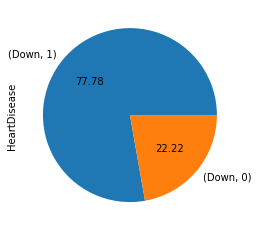

In [246]:
# pie chart for Down(ST_Slope)
group_slope.iloc[0:2,].plot(kind='pie',autopct='%.2f')

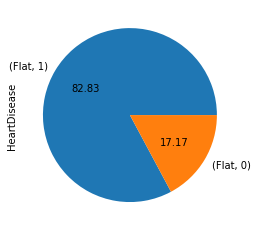

In [247]:
# pie chart for Flat(ST_Slope)
group_slope.iloc[2:4,].plot(kind='pie',autopct='%.2f')

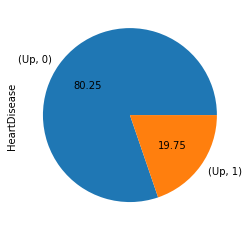

In [248]:
# pie chart for Up(ST_Slope)
group_slope.iloc[4:6,].plot(kind='pie',autopct='%.2f')

# OBSERVATION
1.Heart Disease is major problem for male as 63% male affected by it, whereas only 26% female affected by heart disease.

2.When person have Asymptomatic (ASY) chest pain and /or FastingBS is 1 then there's nearly 80% chances of person is affected by heart diseasee.

3.For RestingECG is ST there's 66% chances of heart disease.

4.Person having ExserciseAngina as Y has very high risk (85%) of heart disease.

5.For ST_Slpoe of Flat and Down have high risk (i.e. 83% and 77% respectively) of heart disease whereas for ST_Slope of Up affection risk is low (20%)